In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
import pickle

In [112]:
load_data=pd.read_csv('cardio_train.csv',sep=";")
load_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [113]:
load_data.loc[:,'age']=load_data.loc[:,'age']/365
load_data['age']=load_data[['age']].round()
load_data['age']=load_data[['age']].astype(int)
load_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [114]:
load_data.head(60)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0
6,9,61,1,157,93.0,130,80,3,1,0,0,1,0
7,12,62,2,178,95.0,130,90,3,3,0,0,1,1
8,13,48,1,158,71.0,110,70,1,1,0,0,1,0
9,14,54,1,164,68.0,110,60,1,1,0,0,0,0


In [115]:
condition1=((load_data['ap_hi']>250) | (load_data['ap_lo']>200))

In [116]:
load_data=load_data[~condition1]

In [117]:
condition2=((load_data['ap_lo']<=0) | (load_data['ap_hi']<=0))

In [118]:
load_data=load_data[~condition2]

In [119]:
load_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [120]:
load_data['age'].min()

30

In [121]:
load_data.shape

(68985, 13)

In [122]:
for i in load_data.columns:
    print(i,load_data[i][load_data[i]!=np.nan].count())

id 68985
age 68985
gender 68985
height 68985
weight 68985
ap_hi 68985
ap_lo 68985
cholesterol 68985
gluc 68985
smoke 68985
alco 68985
active 68985
cardio 68985


In [123]:
load_data=load_data[load_data['height']>130]

In [124]:
load_data=load_data[load_data['weight']>55]

In [125]:
load_data.shape

(64838, 13)

In [126]:
load_data[load_data['gluc']<=0].count()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [127]:
for i in load_data.columns:
    print(i,load_data[i].max(),load_data[i].min())

id 99999 0
age 65 30
gender 2 1
height 250 131
weight 200.0 55.2
ap_hi 240 7
ap_lo 190 6
cholesterol 3 1
gluc 3 1
smoke 1 0
alco 1 0
active 1 0
cardio 1 0


In [128]:
load_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000
mean,49931.698510,53.392501,1.359789,164.897637,75.547864,126.857398,81.657469,1.370169,1.230606,0.089269,0.054999,0.802261,0.506185
std,28818.764128,6.732871,0.479942,7.681656,13.445976,17.576171,9.683494,0.683687,0.577078,0.285133,0.227979,0.398297,0.499966
min,0.000000,30.000000,1.000000,131.000000,55.200000,7.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25008.250000,49.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49942.000000,54.000000,1.000000,165.000000,73.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74752.750000,58.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
load_data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003079,0.004348,-0.001007,0.001320,0.003908,0.002078,0.005498,0.002510,-0.003391,-0.000707,0.004817,0.004816
age,0.003079,1.000000,-0.031722,-0.096165,0.045253,0.189284,0.142835,0.154045,0.099756,-0.053103,-0.031055,-0.010288,0.232816
gender,0.004348,-0.031722,1.000000,0.524804,0.132439,0.047140,0.055502,-0.040343,-0.024255,0.337047,0.169855,0.004426,-0.000918
height,-0.001007,-0.096165,0.524804,1.000000,0.248243,-0.010467,0.009534,-0.065801,-0.031005,0.198451,0.096489,-0.008340,-0.031511
weight,0.001320,0.045253,0.132439,0.248243,1.000000,0.233329,0.222919,0.143368,0.104846,0.065699,0.064407,-0.014983,0.161682
ap_hi,0.003908,0.189284,0.047140,-0.010467,0.233329,1.000000,0.641681,0.184979,0.085275,0.025613,0.028793,0.002271,0.393735
ap_lo,0.002078,0.142835,0.055502,0.009534,0.222919,0.641681,1.000000,0.154926,0.072758,0.023537,0.040545,-0.000002,0.321567
cholesterol,0.005498,0.154045,-0.040343,-0.065801,0.143368,0.184979,0.154926,1.000000,0.451011,0.007948,0.034334,0.008039,0.218615
gluc,0.002510,0.099756,-0.024255,-0.031005,0.104846,0.085275,0.072758,0.451011,1.000000,-0.007662,0.010159,-0.008549,0.087323
smoke,-0.003391,-0.053103,0.337047,0.198451,0.065699,0.025613,0.023537,0.007948,-0.007662,1.000000,0.340634,0.024651,-0.017829


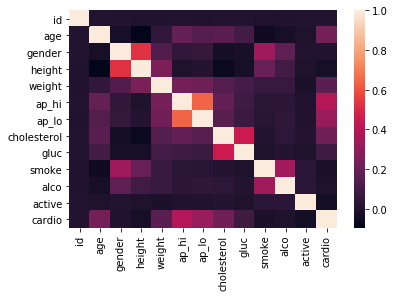

In [130]:
sns.heatmap(load_data.corr())

In [131]:
load_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000
mean,49931.698510,53.392501,1.359789,164.897637,75.547864,126.857398,81.657469,1.370169,1.230606,0.089269,0.054999,0.802261,0.506185
std,28818.764128,6.732871,0.479942,7.681656,13.445976,17.576171,9.683494,0.683687,0.577078,0.285133,0.227979,0.398297,0.499966
min,0.000000,30.000000,1.000000,131.000000,55.200000,7.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25008.250000,49.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49942.000000,54.000000,1.000000,165.000000,73.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74752.750000,58.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


(array([4.0000e+00, 0.0000e+00, 2.7750e+03, 3.6860e+03, 6.7260e+03,
        8.8210e+03, 1.3091e+04, 8.3940e+03, 1.2778e+04, 8.5630e+03]),
 array([30. , 33.5, 37. , 40.5, 44. , 47.5, 51. , 54.5, 58. , 61.5, 65. ]),
 <a list of 10 Patch objects>)

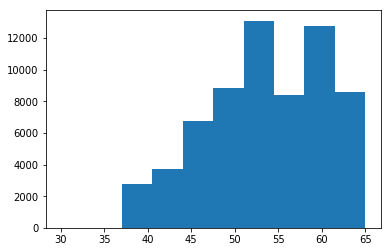

In [132]:
plt.hist(load_data['age'])

In [133]:
load_data[load_data['age']==0].count()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

(array([3.000e+00, 3.000e+00, 6.000e+00, 1.500e+01, 3.600e+01, 3.100e+01,
        7.500e+01, 1.950e+02, 3.690e+02, 1.045e+03, 1.416e+03, 2.069e+03,
        3.884e+03, 4.537e+03, 6.447e+03, 4.629e+03, 5.618e+03, 7.487e+03,
        6.689e+03, 7.294e+03, 3.238e+03, 2.564e+03, 2.869e+03, 1.647e+03,
        1.262e+03, 5.100e+02, 3.080e+02, 3.280e+02, 1.240e+02, 7.700e+01,
        2.300e+01, 8.000e+00, 1.200e+01, 1.800e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([131.        , 132.98333333, 134.96666667, 136.95      ,
        138.93333333, 140.91666667, 142.9       , 144.88333333,
        146.86666667, 148.85      , 150.83333333, 152.81666667,
        154.8       , 156.78333333, 158.76666667, 160.75      ,
  

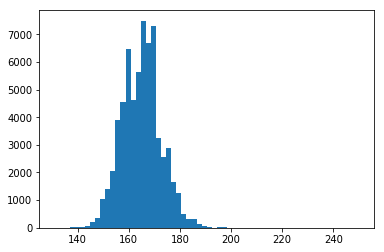

In [134]:
plt.hist(load_data['height'],bins=60)

(array([1.671e+03, 5.032e+03, 2.808e+03, 3.193e+03, 6.798e+03, 4.987e+03,
        7.425e+03, 3.276e+03, 4.215e+03, 4.283e+03, 3.443e+03, 3.361e+03,
        2.581e+03, 1.510e+03, 2.596e+03, 1.237e+03, 1.614e+03, 8.520e+02,
        9.890e+02, 4.860e+02, 5.290e+02, 4.080e+02, 3.560e+02, 2.480e+02,
        1.850e+02, 1.020e+02, 1.930e+02, 4.500e+01, 9.700e+01, 4.700e+01,
        8.600e+01, 2.200e+01, 2.100e+01, 3.200e+01, 1.000e+01, 2.400e+01,
        5.000e+00, 6.000e+00, 5.000e+00, 1.300e+01, 6.000e+00, 5.000e+00,
        2.000e+00, 4.000e+00, 3.000e+00, 1.000e+01, 2.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 55.2       ,  57.61333333,  60.02666667,  62.44      ,
         64.85333333,  67.26666667,  69.68      ,  72.09333333,
         74.50666667,  76.92      ,  79.33333333,  81.74666667,
         84.16      ,  86.57333333,  88.98666667,  91.4       ,
  

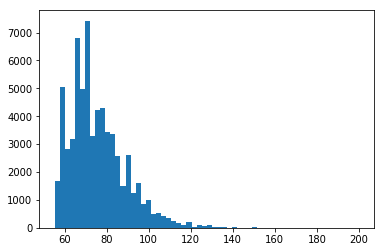

In [135]:
plt.hist(load_data['weight'],bins=60)

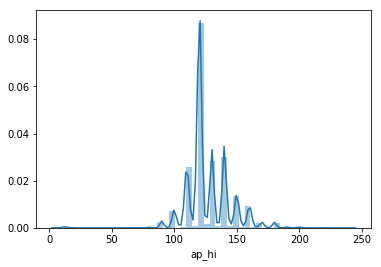

In [136]:
sns.distplot(load_data['ap_hi'])

Writing a function to detect outliers in case needed.
This works on the basis of Z value.
The ones with Z-value greater than 3 are considered as outliers.

In [137]:
def detecting_outliers_for_features(data):
    outliers=[]
    t=3
    row=0
    l=len(data)
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        #print(row)
        temp=(i-mean)/std
        if temp>t:
            outliers.append(row)
            load_data.drop([load_data.index[i]],inplace=True)
        row=row+1    
    return outliers       

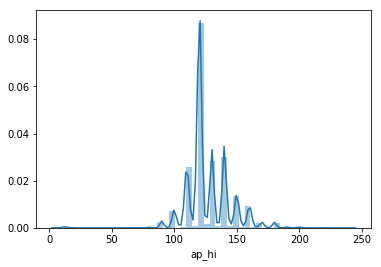

In [138]:
sns.distplot(load_data['ap_hi'])

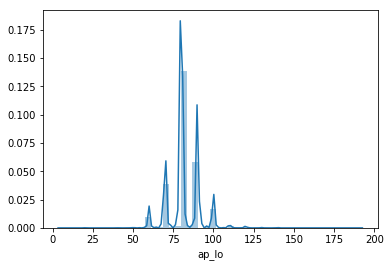

In [139]:
sns.distplot(load_data['ap_lo'])

In [140]:
load_data.head(100)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0
6,9,61,1,157,93.0,130,80,3,1,0,0,1,0
7,12,62,2,178,95.0,130,90,3,3,0,0,1,1
8,13,48,1,158,71.0,110,70,1,1,0,0,1,0
9,14,54,1,164,68.0,110,60,1,1,0,0,0,0


In [141]:
load_data.shape

(64838, 13)

In [142]:
load_data['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

In [143]:
load_data['gluc'].unique()

array([1, 2, 3], dtype=int64)

In [144]:
load_data['smoke'].unique()

array([0, 1], dtype=int64)

In [145]:
load_data['alco'].unique()

array([0, 1], dtype=int64)

In [146]:
load_data['active'].unique()

array([1, 0], dtype=int64)

In [147]:
load_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0
6,9,61,1,157,93.0,130,80,3,1,0,0,1,0
7,12,62,2,178,95.0,130,90,3,3,0,0,1,1
8,13,48,1,158,71.0,110,70,1,1,0,0,1,0
9,14,54,1,164,68.0,110,60,1,1,0,0,0,0


In [148]:
gender_dum = pd.get_dummies(load_data['gender'], prefix = "gender",drop_first=True)
cholesterol_dum = pd.get_dummies(load_data['cholesterol'], prefix = "cholesterol",drop_first=True)
gluc_dum = pd.get_dummies(load_data['gluc'], prefix = "gluc",drop_first=True)

In [149]:
new_data=pd.concat([load_data,gender_dum,cholesterol_dum,gluc_dum],axis=1)
new_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,1,0,0,0,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,0,0,1,0,0
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,0,0,1,0,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,1,0,0,0,0
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,0,0,0,0,0
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0,0,1,0,1,0
6,9,61,1,157,93.0,130,80,3,1,0,0,1,0,0,0,1,0,0
7,12,62,2,178,95.0,130,90,3,3,0,0,1,1,1,0,1,0,1
8,13,48,1,158,71.0,110,70,1,1,0,0,1,0,0,0,0,0,0
9,14,54,1,164,68.0,110,60,1,1,0,0,0,0,0,0,0,0,0


In [150]:
new_data.drop(columns=['id','gender','cholesterol','gluc'],axis=1,inplace=True)

In [151]:
new_data.head(10)

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,50,168,62.0,110,80,0,0,1,0,1,0,0,0,0
1,55,156,85.0,140,90,0,0,1,1,0,0,1,0,0
2,52,165,64.0,130,70,0,0,0,1,0,0,1,0,0
3,48,169,82.0,150,100,0,0,1,1,1,0,0,0,0
4,48,156,56.0,100,60,0,0,0,0,0,0,0,0,0
5,60,151,67.0,120,80,0,0,0,0,0,1,0,1,0
6,61,157,93.0,130,80,0,0,1,0,0,0,1,0,0
7,62,178,95.0,130,90,0,0,1,1,1,0,1,0,1
8,48,158,71.0,110,70,0,0,1,0,0,0,0,0,0
9,54,164,68.0,110,60,0,0,0,0,0,0,0,0,0


In [152]:
Y=new_data.iloc[:,8].values

In [153]:
Y[0:4]

array([0, 1, 1, 1], dtype=int64)

In [154]:
new_data.drop(columns=['cardio'],axis=1,inplace=True)
new_data.head(10)

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,50,168,62.0,110,80,0,0,1,1,0,0,0,0
1,55,156,85.0,140,90,0,0,1,0,0,1,0,0
2,52,165,64.0,130,70,0,0,0,0,0,1,0,0
3,48,169,82.0,150,100,0,0,1,1,0,0,0,0
4,48,156,56.0,100,60,0,0,0,0,0,0,0,0
5,60,151,67.0,120,80,0,0,0,0,1,0,1,0
6,61,157,93.0,130,80,0,0,1,0,0,1,0,0
7,62,178,95.0,130,90,0,0,1,1,0,1,0,1
8,48,158,71.0,110,70,0,0,1,0,0,0,0,0
9,54,164,68.0,110,60,0,0,0,0,0,0,0,0


In [168]:
X=new_data.iloc[:,:].values
print(X[:3,:])

[[ 50. 168.  62. 110.  80.   0.   0.   1.   1.   0.   0.   0.   0.]
 [ 55. 156.  85. 140.  90.   0.   0.   1.   0.   0.   1.   0.   0.]
 [ 52. 165.  64. 130.  70.   0.   0.   0.   0.   0.   1.   0.   0.]]


In [169]:
from sklearn.preprocessing import StandardScaler

In [170]:
std_scaler=StandardScaler()
std_scaler.fit(X)
X=std_scaler.transform(X)

In [172]:
pickle.dump(std_scaler, open('scaler1.pkl','wb'))

In [171]:
print(X[:5,:])

[[-0.50387528  0.4038695  -1.00758536 -0.95911269 -0.17116571 -0.31307927
  -0.24124573  0.49646461  1.33394405 -0.39656458 -0.36425263 -0.2847838
  -0.29044154]
 [ 0.23875565 -1.15830563  0.70297674  0.74775689  0.86152731 -0.31307927
  -0.24124573  0.49646461 -0.74965663 -0.39656458  2.74534737 -0.2847838
  -0.29044154]
 [-0.20682291  0.01332572 -0.85884083  0.17880037 -1.20385872 -0.31307927
  -0.24124573 -2.01424225 -0.74965663 -0.39656458  2.74534737 -0.2847838
  -0.29044154]
 [-0.80092765  0.53405076  0.47985994  1.31671342  1.89422032 -0.31307927
  -0.24124573  0.49646461  1.33394405 -0.39656458 -0.36425263 -0.2847838
  -0.29044154]
 [-0.80092765 -1.15830563 -1.45381895 -1.52806921 -2.23655173 -0.31307927
  -0.24124573 -2.01424225 -0.74965663 -0.39656458 -0.36425263 -0.2847838
  -0.29044154]]


In [49]:
x_train_in,x_test,y_train_in,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lgr=LogisticRegression()
lgr.fit(x_train_in,y_train_in)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
print(lgr.coef_)
print(lgr.intercept_)

[[ 0.34545804 -0.0343761   0.14733957  0.81263974  0.21983557 -0.04115831
  -0.05146546 -0.10522395 -0.00312264  0.13611384  0.34988273  0.00540913
  -0.08403338]]
[0.07500589]


In [53]:
predictions=lgr.predict(x_train_in)
print(predictions)
predictions1=lgr.predict(x_test)
print(predictions1)

[1 0 0 ... 0 1 0]
[0 1 1 ... 0 0 1]


In [54]:
print(sum(np.square(predictions-y_train_in)))
print(sum(np.square(predictions1-y_test)))

13379
4537


In [55]:
paramslog={'C':[0.1,0.5,1,2,4,8,100,500]}


In [56]:
def hypertuning(est,param,n_iter,cv,x_train_in,y_train_in):
    rscv=RandomizedSearchCV(estimator=est,param_distributions=param,n_iter=n_iter,cv=cv,n_jobs=-1)
    rscv.fit(x_train_in,y_train_in)
    bt_parameters=rscv.best_params_
    bt_score=rscv.best_score_
    return bt_parameters,bt_score

In [57]:
bt_parameters,bt_score=hypertuning(lgr,paramslog,100,10,x_train_in,y_train_in)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
bt_parameters

{'C': 0.1}

In [59]:
finallgr=LogisticRegression(C=0.1)
finallgr.fit(x_train_in,y_train_in)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
predictions2=finallgr.predict(x_train_in)
#print(predictions)
predictions3=finallgr.predict(x_test)
#print(predictions1)

In [61]:
print(sum(np.square(predictions2-y_train_in)))
print(sum(np.square(predictions3-y_test)))

13380
4536


In [62]:
cf_matrix=metrics.confusion_matrix(y_test,predictions1)
print(cf_matrix)

[[6091 1900]
 [2637 5582]]


In [63]:
from sklearn.svm import SVC

In [64]:
svmclassifier=SVC(kernel='rbf')
svmclassifier.fit(x_train_in,y_train_in)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [65]:
prediction=svmclassifier.predict(x_test)
print(sum(np.square(prediction-y_test)))

4460


In [66]:
cf_matrix=metrics.confusion_matrix(y_test,prediction)
print(cf_matrix)

[[6165 1826]
 [2634 5585]]


In [67]:
acc_svm = metrics.accuracy_score(y_test, prediction)
print(acc_svm)

0.7248611967921036


In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
DT=DecisionTreeClassifier(random_state=1)

In [70]:
DT.fit(x_train_in,y_train_in)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [71]:
ac_dc=metrics.accuracy_score(y_test,DT.predict(x_test))
print(ac_dc)

0.6309068476249229


In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
est=DecisionTreeClassifier(random_state=1)

In [74]:

params_DT={'max_depth':[5,10,50,None],
       'criterion':['entropy','gini'],
       'max_features':['log2','sqrt'],
        'min_samples_split' : [5, 10],
       'min_samples_leaf':[4,8,16]
        }

In [75]:
def hypertuning_DT(est,param,n_iter,cv,x_train_in,y_train_in):
    rscv=RandomizedSearchCV(estimator=est,param_distributions=param,n_iter=n_iter,cv=cv,n_jobs=-1)
    rscv.fit(x_train_in,y_train_in)
    bt_parameters=rscv.best_params_
    bt_score=rscv.best_score_
    return bt_parameters,bt_score

In [76]:
best_parameters_DT,best_sco_DT=hypertuning_DT(est,params_DT,100,4,x_train_in,y_train_in)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [77]:
best_parameters_DT

{'min_samples_split': 5,
 'min_samples_leaf': 16,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'entropy'}

In [78]:
dectree=DecisionTreeClassifier(min_samples_split= 5,
 min_samples_leaf= 16,
 max_features= 'log2',
 max_depth=10,
 criterion='entropy',random_state=1)

In [79]:
dectree.fit(x_train_in,y_train_in)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [80]:
cf_matrix_dc=metrics.confusion_matrix(y_test,dectree.predict(x_test))
print(cf_matrix_dc)

[[6184 1807]
 [2713 5506]]


In [81]:
f1=metrics.accuracy_score(y_test,dectree.predict(x_test))
print(f1)

0.7211597779148674


In [82]:
gb1=GradientBoostingClassifier(random_state=0)

In [83]:
gb1.fit(x_train_in,y_train_in)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [84]:
cf_matrix_gb1=metrics.confusion_matrix(y_test,gb1.predict(x_test))
print(cf_matrix_gb1)

[[6058 1933]
 [2447 5772]]


In [85]:
gb1_f1=metrics.f1_score(y_test,gb1.predict(x_test))
print(gb1_f1)

0.7249434815373023


In [86]:
gb1_prec=metrics.precision_score(y_test,gb1.predict(x_test))
print(gb1_prec)

0.7491239454899415


In [87]:
gb1_recall=metrics.recall_score(y_test,gb1.predict(x_test))
print(gb1_recall)

0.7022752159630126


In [88]:
gb=GradientBoostingClassifier(n_estimators=500, max_features='sqrt',max_leaf_nodes=40, max_depth = 20,learning_rate=0.05,random_state=0)
gb.fit(x_train_in,y_train_in)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=20,
              max_features='sqrt', max_leaf_nodes=40,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [89]:
cf_matrix_gb=metrics.confusion_matrix(y_test,gb.predict(x_test))
print(cf_matrix_gb)

[[6049 1942]
 [2482 5737]]


In [90]:
gb_f1=metrics.f1_score(y_test,gb.predict(x_test))
print(gb_f1)

0.7217260032708516


In [91]:
gb_prec=metrics.precision_score(y_test,gb.predict(x_test))
print(gb_prec)

0.7471024873030343


In [92]:
gb_recall=metrics.recall_score(y_test,gb.predict(x_test))
print(gb_recall)

0.6980167903637912


In [93]:
gb_accuracy=metrics.accuracy_score(y_test,gb.predict(x_test))
print(gb_accuracy)

0.7270820481184455


In [216]:
import pickle
pickle.dump(gb, open('model1.pkl','wb'))